7/7 - 0s - loss: 2.2790e-09 - accuracy: 0.0000e+00 - 96ms/epoch - 14ms/step
7/7 [==============================] - 0s 834us/step


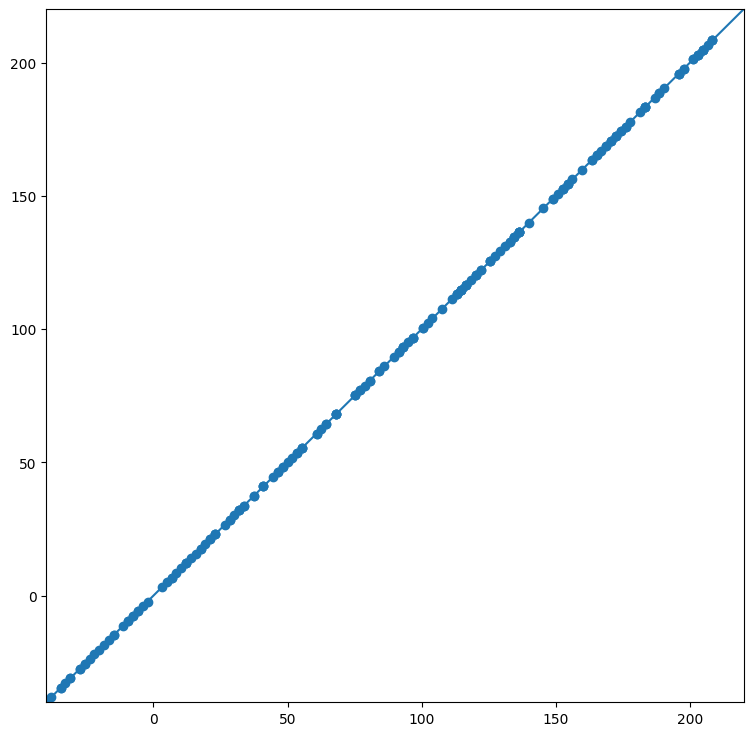

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math as m
# lambda x: (1.8*x) + 32
size=1000
celsius_q = np.random.choice(range(-40,100), size)
f = lambda x: (1.8*x) + 32
fahrenheit_a = f(celsius_q)
def cast(input, labels):
    return np.array(input, dtype=float), np.array(labels, dtype=float)
train_data, train_labels = cast(celsius_q[:m.ceil(size*.8)], fahrenheit_a[:m.ceil(size*.8)])
test_data, test_labels = cast(celsius_q[m.ceil(size*.8):], fahrenheit_a[m.ceil(size*.8):])
cast = lambda x: np.array(x, dtype=float)

l0= tf.keras.layers.Dense(1, input_shape=[1])
model = tf.keras.Sequential([
    l0,
])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1), metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=1000, verbose=False)

model.evaluate(test_data, test_labels, verbose=2)
predictions = model.predict(test_data)
plt.figure(figsize=(9,9))
plt.scatter(test_labels, predictions)
lims = [-40, 220]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)
plt.show()
